<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week6_Day2_ExercieXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Deep Learning vs. Traditional Machine Learning

| **Aspect**              | **Traditional Machine Learning**                                   | **Deep Learning**                                                    |
| ----------------------- | ------------------------------------------------------------------ | -------------------------------------------------------------------- |
| **Feature Engineering** | ✅ **Manual**: Requires domain knowledge to select/create features. | ❌ **Automatic**: Learns features directly from raw data.             |
| **Data Processing**     | ✅ Works well with **structured data** (e.g., tables, CSV).         | ❌ Requires **large, often unstructured data** (e.g., images, audio). |
| **Scalability**         | ❌ Less scalable with very large datasets.                          | ✅ Highly scalable, performs better as data size increases.           |
| **Pattern Discovery**   | ✅ Good at discovering **simple or linear patterns**.               | ✅ Capable of learning **complex, non-linear patterns**.              |
| **Computational Needs** | ✅ **Lightweight**: Can run on standard CPUs.                       | ❌ **High**: Needs powerful GPUs/TPUs for training.                   |


2. Real-World Examples:
- Traditional Machine Learning is better suited for:
Credit scoring — Predicting whether a loan applicant will repay based on structured tabular data (income, age, employment status). The data is clean, small-to-medium sized, and doesn’t require complex pattern recognition.

- Deep Learning is better suited for:
Autonomous driving — Interpreting images from cameras to detect pedestrians, traffic signs, and road lanes. This involves large amounts of unstructured image and video data that require powerful pattern recognition.

3. Why Deep Learning Excels with Unstructured Data:

Deep learning has a strong advantage when dealing with unstructured data like images, text, and audio because it automatically learns meaningful features from raw input without manual intervention. Neural networks, especially deep architectures like CNNs and RNNs, can capture complex patterns, hierarchies, and context in the data. Unlike traditional ML, which relies on predefined features, deep learning models adaptively extract features during training. This allows them to perform exceptionally well in tasks such as image classification, speech recognition, and natural language understanding.

Exercise 2: Artificial Neural Networks (ANNs)

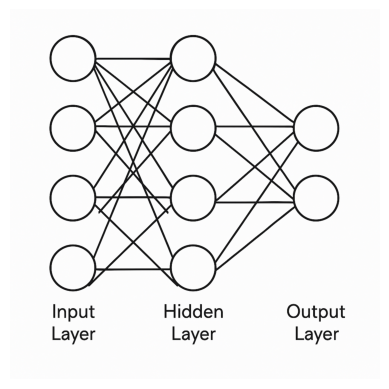

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/Graphique.png')  # Replace with your image path
plt.imshow(img)
plt.axis('off')  # Optional: hides the axes
plt.show()


| Component               | Description                                                                                      |
| ----------------------- | ------------------------------------------------------------------------------------------------ |
| **Neurons**             | Circles in each layer that receive and process inputs.                                           |
| **Weights**             | Lines connecting neurons from one layer to the next, indicating strength of influence.           |
| **Biases**              | Each neuron (except input) has a bias added before activation to shift output.                   |
| **Activation Function** | A mathematical function applied at each neuron to introduce non-linearity (e.g., ReLU, sigmoid). |
| **Layers**              | The network has 3 types of layers: input layer, hidden layer(s), and output layer.               |


How Information Flows Through the Network

In an artificial neural network (ANN), information flows forward from the input layer through one or more hidden layers to the output layer. Each input neuron passes its value to every neuron in the next layer, multiplied by a weight, then added to a bias. The result goes through an activation function, which decides how strongly the neuron will fire. This process continues layer by layer. Finally, the output layer produces the prediction or classification result based on the final activations.

Exercise 3: Creating the Dataset and Visualizing the Data

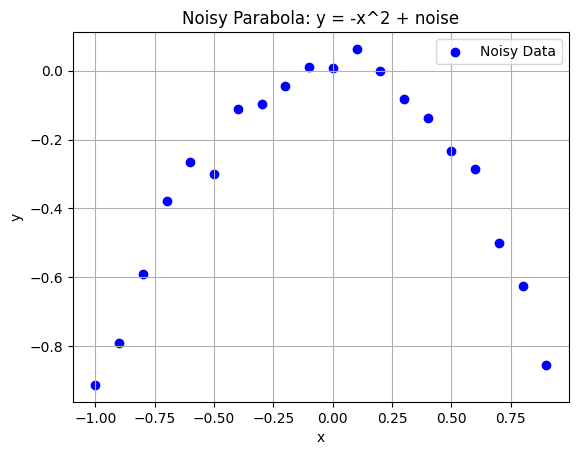

In [2]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 2: Create dataset with noise
np.random.seed(0)
x = np.arange(-1, 1, 0.1)                      # 20 points from -1 to 0.9
y = -x**2 + np.random.normal(0, 0.05, len(x))  # y = -x^2 + Gaussian noise

# Step 3: Scatter plot of the noisy data
plt.scatter(x, y, color='blue', label='Noisy Data')
plt.title('Noisy Parabola: y = -x^2 + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Split into training and test sets
x_train, y_train = x[:12], y[:12]  # First 12 points
x_test, y_test = x[12:], y[12:]    # Last 8 points


Exercise 4: Fitting Polynomial Models of Different Degrees

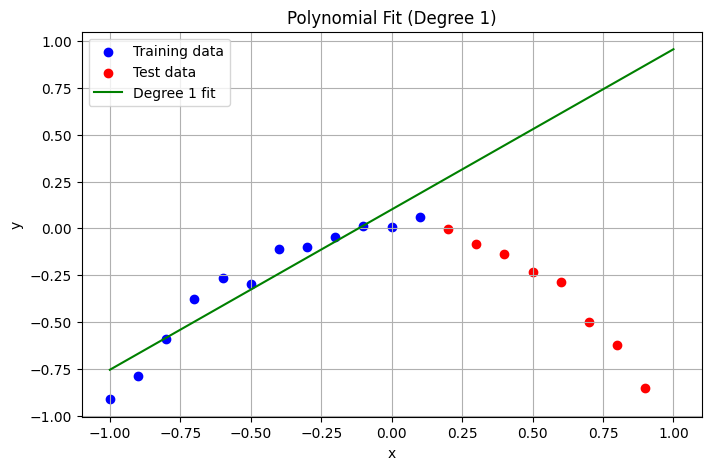

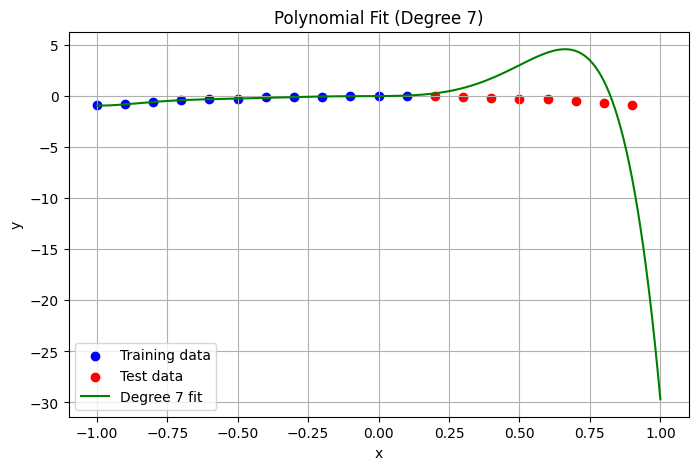

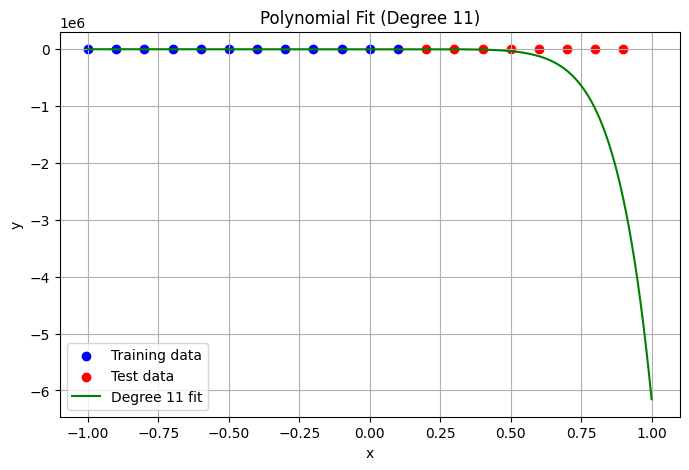

In [3]:
# Step 1: Function to fit polynomial of given degree
def polynomial_fit(degree):
    coeffs = np.polyfit(x_train, y_train, degree)
    return np.poly1d(coeffs)

# Step 2: Function to plot data and polynomial fit
def plot_polyfit(degree):
    model = polynomial_fit(degree)

    # Create smooth x-values for curve plotting
    x_curve = np.linspace(-1, 1, 200)
    y_curve = model(x_curve)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x_train, y_train, color='blue', label='Training data')
    plt.scatter(x_test, y_test, color='red', label='Test data')
    plt.plot(x_curve, y_curve, color='green', label=f'Degree {degree} fit')
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Visualize fits
plot_polyfit(1)
plot_polyfit(7)
plot_polyfit(11)


Exercise 5: Cross-Validation to Find the Optimal Degree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example training and test data (replace with your actual data)
# X_train, y_train, X_test, y_test = ...

def polynomial_fit_and_rmse(degree, X_train, y_train, X_test, y_test):
    # Generate polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Compute RMSE for train and test sets
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return rmse_train, rmse_test

# Storage for results: list of tuples (degree, rmse_train, rmse_test)
results = []

# Loop through degrees 1 to 11
for degree in range(1, 12):
    rmse_train, rmse_test = polynomial_fit_and_rmse(degree, X_train, y_train, X_test, y_test)
    results.append((degree, rmse_train, rmse_test))

# Convert results to numpy array for easier plotting
results = np.array(results)

# Plot RMSE vs polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], marker='o', label='Train RMSE')
plt.plot(results[:, 0], results[:, 2], marker='o', label='Test RMSE')
plt.yscale('log')  # logarithmic scale for y-axis
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE (log scale)')
plt.title('RMSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

# Find the degree with minimum test RMSE
best_degree = int(results[np.argmin(results[:, 2]), 0])
print(f"Optimal polynomial degree based on test RMSE: {best_degree}")
